<p style="color:#F6F6F6;background-color:#354259;text-align:center;border-radius:10px 10px;font-weight:bold;font-size:22px"> Attacks against Health Workers Around the World Exploratory Data Analysis                                   
<span style='font-size:28px; background-color:#F6F6F6 ;'></span></p>

<center><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/58/NewYorkTimes.svg/2560px-NewYorkTimes.svg.png" 
             style='border-radius:10px'></center>
<center><img src="https://static01.nyt.com/images/2019/12/29/world/29syria-deconfliction1sub/merlin_154423059_7fb8c12f-88fc-4c7f-8ca4-6d4af23cf196-superJumbo.jpg" 
             style='border-radius:10px'></center>
<img src="https://i.postimg.cc/YCgGPg4W/Screenshot-2022-08-18-213017.png" style='border-radius:10px'>   
             
[![Russia Bombed Four Syrian Hospitals. We Have Proof. | Visual Investigations](https://res.cloudinary.com/marcomontalbano/image/upload/v1660841543/video_to_markdown/images/youtube--rCi-2-Flcxk-c05b58ac6eb4c4700831b2b3070cd403.jpg)](https://www.youtube.com/watch?v=rCi-2-Flcxk "Russia Bombed Four Syrian Hospitals. We Have Proof. | Visual Investigations")

# Table Of Contents

## [<b>1. Importing Libraries</b>](#1)
## [<b>2. Setting Colors</b>](#2)
## [<b>3. LOAD & EXPLORE DATASET</b>](#3)
## [<b>4. Data Preprocessing</b>](#4)
## [<b>5. Data Exploration</b>](#5)
## [<b>6. Correlation Heatmap</b>](#6)
## [<b>7. Exploratory Data Analysis</b>](#7)
## [<b>8. References</b>](#8)

<a id="1"></a> 
# <b>1 <span style='color:#3a0ca3'>|</span> Importing Libraries</b>

In [1]:
import os
import warnings 

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
from matplotlib.colors import ListedColormap

import colorama
from colorama import Fore, Style
warnings.simplefilter(action='ignore', category=FutureWarning)
print(Fore.BLUE + "All Libraries Imported Successfully!")

All Libraries Imported Successfully!


In [2]:
plt.style.use('fivethirtyeight')
print(Fore.BLUE + "All Styles Set!")

All Styles Set!


<a id="2"></a> 
# <b>2 <span style='color:#3a0ca3'>|</span> Setting Colors</b>

### CREDITS: https://www.kaggle.com/andradaolteanu 

In [3]:
# Custom colors
class clr:
    S = '\033[1m' + '\033[96m'
    E = '\033[0m'

In [4]:
my_colors = ["#FF5746", "#FF4633", "#E23836", "#8B4679", "#C53D4C", "#5C4C8F", "#2D51A5", "#5EAFD9", "#449DD1", "#3977BB"]
CMAP1 = ListedColormap(my_colors)

In [5]:
my_colors_1 = ["#ea698b","#d55d92","#c05299","#ac46a1","#973aa8","#822faf","#6d23b6","#6411ad","#571089","#47126b"]

CMAP2 = ListedColormap(my_colors_1)

In [6]:
my_colors_3 = ["#001219", "#9b2226"]

CMAP3 = ListedColormap(my_colors_3)

Notebook Color Scheme ONE:


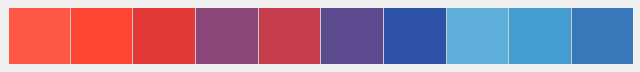

In [7]:
print(clr.S+"Notebook Color Scheme ONE:"+clr.S)
sns.palplot(sns.color_palette(my_colors))
plt.show()

Notebook Color Scheme TWO:


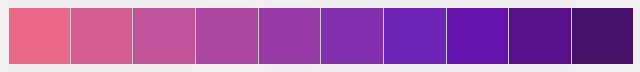

In [8]:
print(clr.S+"Notebook Color Scheme TWO:"+clr.S)
sns.palplot(sns.color_palette(my_colors_1))
plt.show()

Notebook Color Scheme THREE:


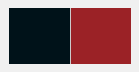

In [9]:
print(clr.S+"Notebook Color Scheme THREE:"+clr.S)
sns.palplot(sns.color_palette(my_colors_3))
plt.show()

<a id="3"></a> 
# <b>3 <span style='color:#3a0ca3'>|</span> LOAD & EXPLORE DATASET</b>

In [10]:
data = pd.read_csv('../input/attacks-against-health-workers-around-the-world/attacks_against_health_activists.csv')

In [11]:
pd.set_option('display.max_columns', 500)
data

,Attack ID,Country,Attack Date,Attack Time,Certainty Level,Attack Type,Total Injured,Total Death,HC Facilities,HC Transport,HC Personnel,HC Supplies Assets,HC Warehouse Storage,HC Patients,HC Other,Type of Facility,Facility Other,HW Abduction,HW Arrest,HW Detention,Patient Abduction,Patient Arrest,Patient Detention
0,oPt007071,Palestine,8/7/2022,06:00-12:00,Confirmed,Violence with heavy weapons (requires more th...,0,0,YES,NO,NO,NO,NO,NO,NaN,Primary,NaN,0,0,0,0,0,0
1,oPt007070,Palestine,8/5/2022,18:00-00:00,Confirmed,Violence with heavy weapons (requires more th...,0,0,NO,YES,NO,NO,NO,NO,NaN,Primary,NaN,0,0,0,0,0,0
2,oPt007095,Palestine,8/2/2022,06:00-12:00,Confirmed,Obstruction to health care delivery (e.g. phy...,0,0,NO,YES,NO,NO,NO,YES,NaN,NaN,NaN,0,0,0,0,0,0
3,UKR007057,Ukraine,8/1/2022,Time Unknown,Confirmed,Violence with heavy weapons (requires more th...,0,0,YES,NO,NO,YES,NO,NO,NaN,Other,Emergency Medical Hospital,0,0,0,0,0,0
4,UKR007045,Ukraine,7/28/2022,Time Unknown,Confirmed,Violence with heavy weapons (requires more th...,0,0,YES,NO,NO,NO,NO,NO,NaN,Secondary,NaN,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3684,CAF000228,Central African Republic,6/20/2017,13:50,Confirmed,Abduction/Arrest/Detention of health personne...,0,0,YES,NO,YES,NO,NO,YES,NaN,Secondary,NaN,0,0,0,2,0,0
3685,CAF000226,Central African Republic,5/24/2017,17:30,Confirmed,Abduction/Arrest/Detention of health personne...,0,2,YES,NO,NO,NO,NO,YES,NaN,Secondary,NaN,0,0,0,2,0,0
3686,AFG000476,Afghanistan,4/1/2017,0:00,Confirmed,Obstruction to health care delivery (e.g. phy...,0,0,YES,NO,NO,NO,NO,NO,NaN,NaN,NaN,0,0,0,0,0,0
3687,CAF000225,Central African Republic,2/28/2017,8:30,Confirmed,Abduction/Arrest/Detention of health personne...,0,0,NO,NO,YES,NO,NO,NO,NaN,Primary,NaN,1,0,0,0,0,0


In [12]:
data.describe().style.background_gradient(cmap='Spectral')

,Total Injured,Total Death,HW Abduction,HW Arrest,HW Detention,Patient Abduction,Patient Arrest,Patient Detention
count,3689.000000,3689.000000,3689.000000,3689.000000,3689.000000,3689.000000,3689.000000,3689.000000
mean,0.695853,0.291407,0.087015,0.129032,0.040661,0.018975,0.004066,0.006506
std,2.599576,2.479730,0.585681,3.367840,0.370371,0.364010,0.091592,0.118564
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,50.000000,87.000000,17.000000,200.000000,7.000000,15.000000,4.000000,5.000000


<a id="4"></a> 
# <b>4 <span style='color:#3a0ca3'>|</span> Data Preprocessing </b>

In [13]:
data['Attack Time'] = data['Attack Time'].replace(['Time Unknown'],'')

In [14]:
# replace field that's entirely space (or empty) with NaN
data = data.replace(r'^\s*$', np.nan, regex=True)

<AxesSubplot:>

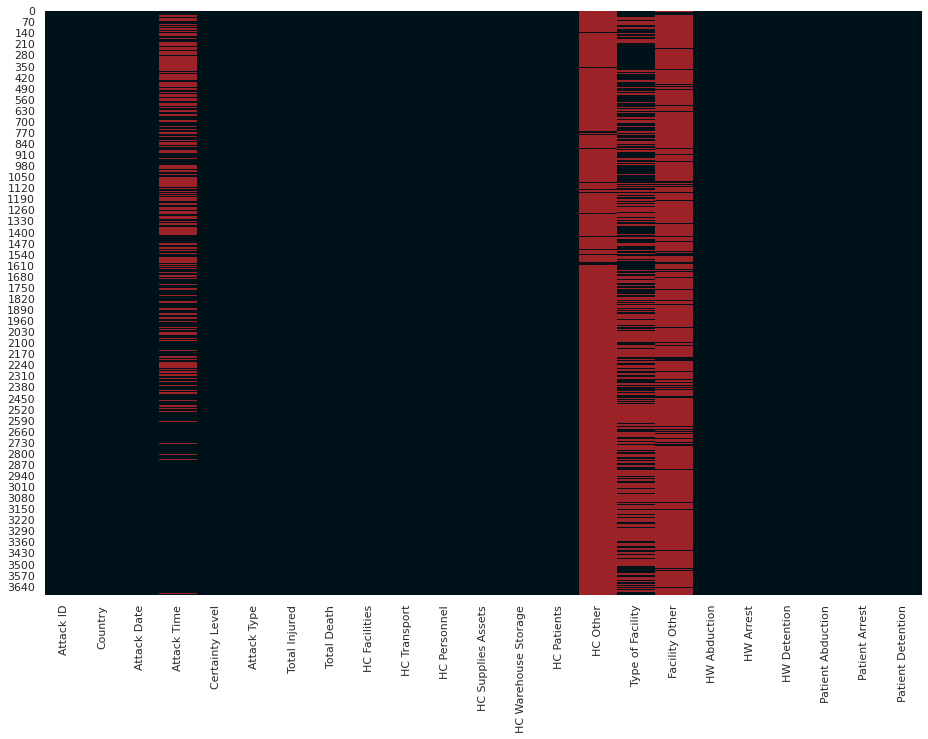

In [15]:
# Plot to see null values in our data
sns.set(rc={'figure.figsize':(14,10)})
sns.heatmap(data.isnull(), cbar=False, cmap=CMAP3)

In [16]:
# Null Value Percentage Per column
percent_missing = data.isnull().sum() * 100 / len(data)
missing_value_df = pd.DataFrame({'column_name': data.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', ascending=False).style.background_gradient(cmap='Spectral')

,column_name,percent_missing
HC Other,HC Other,97.695853
Facility Other,Facility Other,86.879913
Type of Facility,Type of Facility,48.088913
Attack Time,Attack Time,33.965844
Country,Country,0.027108
Attack ID,Attack ID,0.000000
HC Patients,HC Patients,0.000000
Patient Arrest,Patient Arrest,0.000000
Patient Abduction,Patient Abduction,0.000000
HW Detention,HW Detention,0.000000


## Taking Care of Nulls

In [17]:
data = data.drop(['HC Other', 'Facility Other'], axis=1)

In [18]:
data = data[data['Country'].notna()]

In [19]:
data = data.drop(['Attack Time'], axis=1)

## Taking Care of Data types

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3688 entries, 0 to 3688
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Attack ID             3688 non-null   object
 1   Country               3688 non-null   object
 2   Attack Date           3688 non-null   object
 3   Certainty Level       3688 non-null   object
 4   Attack Type           3688 non-null   object
 5   Total Injured         3688 non-null   int64 
 6   Total Death           3688 non-null   int64 
 7   HC Facilities         3688 non-null   object
 8   HC Transport          3688 non-null   object
 9   HC Personnel          3688 non-null   object
 10  HC Supplies Assets    3688 non-null   object
 11  HC Warehouse Storage  3688 non-null   object
 12  HC Patients           3688 non-null   object
 13  Type of Facility      1914 non-null   object
 14  HW Abduction          3688 non-null   int64 
 15  HW Arrest             3688 non-null   

In [21]:
# Change date column to datetime type and create year, month and day column as well
data['Attack Date'] = pd.to_datetime(data['Attack Date'])
data['year'] = data['Attack Date'].dt.year
data['month'] = data['Attack Date'].dt.month
data['day'] = data['Attack Date'].dt.day
data['dayOfWeek'] = data['Attack Date'].dt.weekday # The day of the week with Monday=0, Sunday=6.
data['Weekday_Name'] = data['Attack Date'].dt.day_name()
data['Month_Name'] = data['Attack Date'].dt.month_name()

<a id="5"></a> 
# <b>5 <span style='color:#3a0ca3'>|</span> Data Exploration</b>

In [22]:
data.sample(5)

,Attack ID,Country,Attack Date,Certainty Level,Attack Type,Total Injured,Total Death,HC Facilities,HC Transport,HC Personnel,HC Supplies Assets,HC Warehouse Storage,HC Patients,Type of Facility,HW Abduction,HW Arrest,HW Detention,Patient Abduction,Patient Arrest,Patient Detention,year,month,day,dayOfWeek,Weekday_Name,Month_Name
1810,AFG004599,Afghanistan,2020-01-23,Confirmed,"Violence with individual weapons (knives, bri...",0,1,NO,NO,YES,NO,NO,NO,NaN,0,0,0,0,0,0,2020,1,23,3,Thursday,January
1664,LBY004739,Libya,2020-07-04,Probable,"Violence with individual weapons (knives, bri...",0,0,NO,NO,YES,NO,NO,NO,Secondary,0,0,0,0,0,0,2020,7,4,5,Saturday,July
927,oPt005721,Palestine,2021-06-06,Confirmed,"Violence with individual weapons (knives, bri...",0,0,NO,NO,YES,NO,NO,NO,NaN,0,0,0,0,0,0,2021,6,6,6,Sunday,June
3381,oPt000460,Palestine,2018-05-04,Confirmed,"Violence with individual weapons (knives, bri...",1,0,NO,NO,YES,NO,NO,NO,NaN,0,0,0,0,0,0,2018,5,4,4,Friday,May
1093,MMR006120,Myanmar,2021-05-13,Confirmed,Violence with heavy weapons (requires more th...,0,0,YES,NO,NO,NO,NO,NO,Primary,0,0,0,0,0,0,2021,5,13,3,Thursday,May


In [23]:
#List all unique room types
for elem in data['year'].unique():
    print(elem)

2022
2021
2020
2019
2018
2017


In [24]:
#List all unique room types
for elem in data['Type of Facility'].unique():
    print(elem)

Primary
nan
Other
Secondary
Tertiary
Mobile Clinic
Warehouse
Pharmacy


In [25]:
#List all unique room types
for elem in data['Certainty Level'].unique():
    print(elem)

Confirmed
Possible
Probable


In [26]:
#List all unique room types
for elem in data['Country'].unique():
    print(elem)

Palestine
Ukraine
Myanmar
Syria
Nigeria
Yemen
Afghanistan
South Sudan
Sudan
Central African Republic
DR Congo
Libya
Somalia
Burkina Faso
Mali
Iraq


<a id="6"></a> 
# <b>6 <span style='color:#3a0ca3'>|</span> Correlation Heatmap</b>

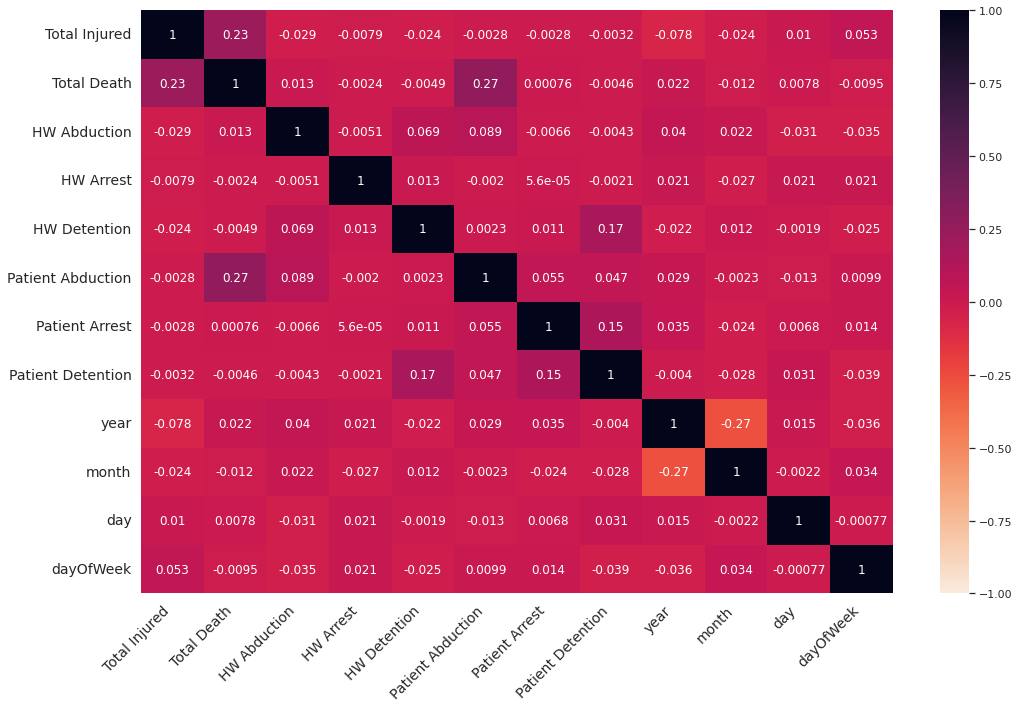

In [27]:
plt.figure(figsize=(15,10))
data_corr = data.corr()
ax = sns.heatmap(
    data_corr,
    vmin=-1, vmax=1, 
    cmap='rocket_r', 
    annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right', size=14
);
ax.set_yticklabels(
    ax.get_yticklabels(),
    size=14
);

<a id="7"></a> 
# <b>7 <span style='color:#3a0ca3'>|</span> Exploratory Data Analysis</b>

# Attacks Against Health Workers

<center><img src="https://upload.wikimedia.org/wikipedia/en/thumb/f/f2/Aljazeera_eng.svg/1200px-Aljazeera_eng.svg.png" 
             style='border-radius:10px'></center>

<center><img src="https://i.postimg.cc/bw2CF6H9/Syria.png" 
             style='border-radius:10px'></center>             

<center><img src="https://www.aljazeera.com/wp-content/uploads/2022/07/5O0B1085.jpg" 
             style='border-radius:10px'></center>

## Countries with Highest Death incidents of Health Workers 

In [28]:
df_1 = data[['Country', 'Total Injured', 'Total Death']].groupby(['Country']).sum().reset_index()
fig = px.bar(df_1, x='Country', y='Total Death', 
             template = 'plotly_white', title= 'Countries with Highest Death incidents of Health Workers', 
             color='Total Death', height=800,
             hover_data= ['Country', 'Total Death', 'Total Injured'])
fig.update_xaxes(tickangle=45, rangeselector_font_size=8)
fig.show()

## Countries with Highest Death incidents of Health Workers

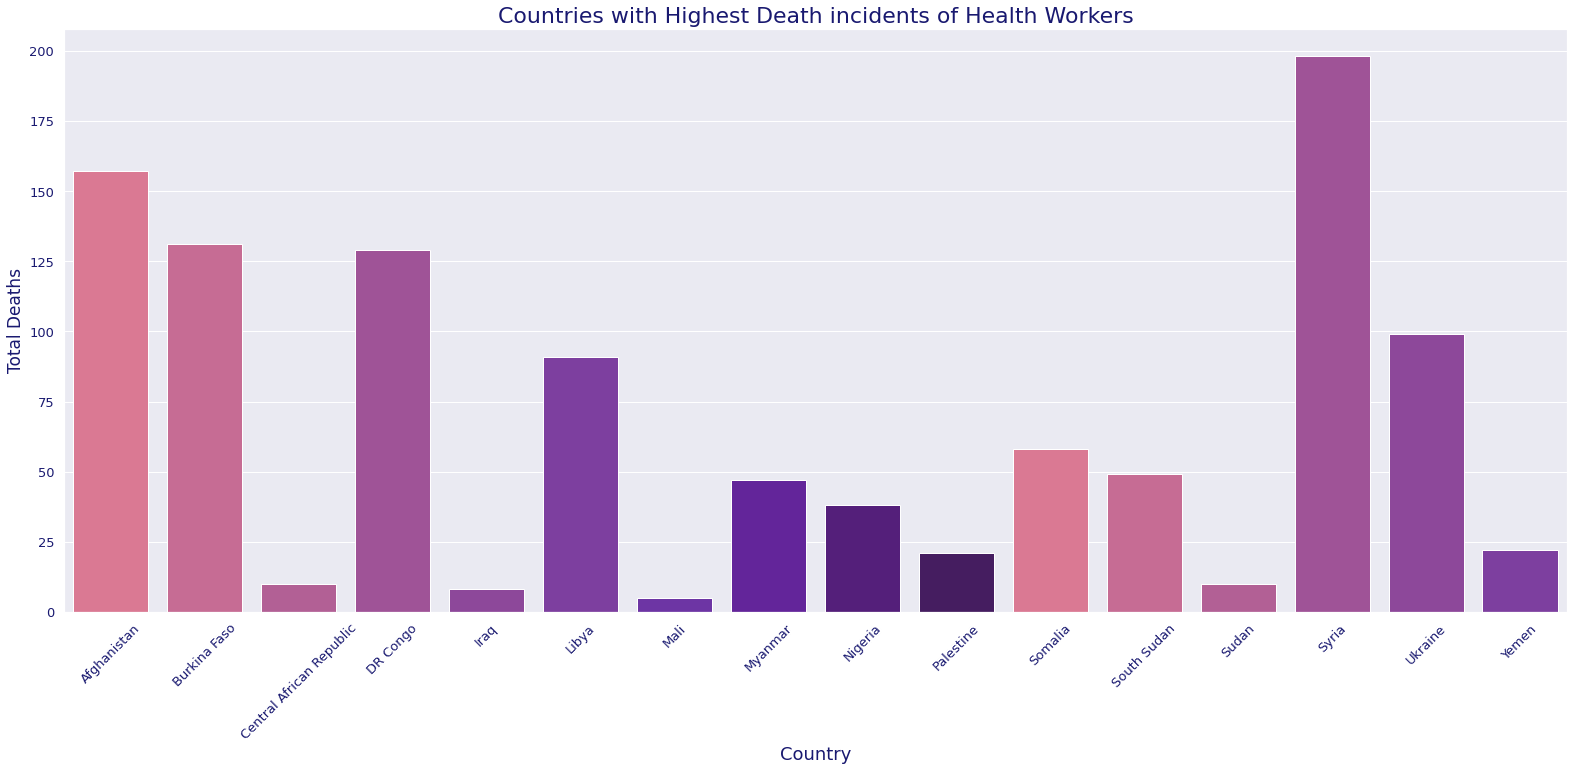

In [29]:
plt.figure(figsize=(24,10))
ax_1 = sns.barplot(x = 'Country', y = 'Total Death', data=df_1, palette=my_colors_1)

plt.xticks(fontsize=13, color='midnightblue', rotation=45)
plt.yticks(fontsize=13, color='midnightblue')
plt.xlabel('Country', size = 18, color='midnightblue')
plt.ylabel('Total Deaths', size = 17 , color='midnightblue')
plt.title('Countries with Highest Death incidents of Health Workers', size = 22 , color='midnightblue')
plt.show()

## Countries with Highest Cases of Injured Health Workers

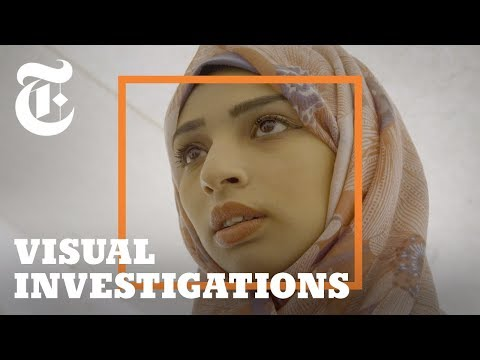

In [30]:
from IPython.display import YouTubeVideo
YouTubeVideo('w0inm3oS71c', width=1400, height=800)

<center><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/58/NewYorkTimes.svg/2560px-NewYorkTimes.svg.png" 
             style='border-radius:10px'></center>
<center><img src="https://i.postimg.cc/90rtwMLY/GAZA.png" 
             style='border-radius:10px'></center>
<center><img src="https://i.postimg.cc/brDkN5v6/Rouzan-al-Najjar.png" 
             style='border-radius:10px'></center>
<center><img src="https://static01.nyt.com/images/2018/12/30/world/30gaza-p1/merlin_140018961_de0c7095-f48f-4b26-9926-0bb3b6f33c58-superJumbo.jpg?quality=75&auto=webp" 
             style='border-radius:10px'></center>

> ### A mural in Bethlehem depicting Ms. Najjar. In death, she became a martyr, famous throughout the Palestinian territories.

<center><img src="https://static01.nyt.com/images/2018/12/30/world/30gaza-teargas/merlin_138980307_377671d3-de8f-42b5-971d-be8bdee02a78-superJumbo.jpg?quality=75&auto=webp" 
             style='border-radius:10px'></center>
             
> ### Around 5 p.m., the protest gains energy. A crowd surges toward the fence and the Israelis unleash a suffocating barrage of tear gas.

<center><img src="https://static01.nyt.com/images/2018/12/30/world/30gaza-snapshots/merlin_139082523_efe4fe9a-23dc-45bb-9cbd-f9da5684bed0-superJumbo.jpg?quality=75&auto=webp" 
style='border-radius:10px'></center>

> ### Photos from Ms. Najjar’s childhood, and her passport.

<center><img src="https://static01.nyt.com/images/2018/12/30/world/30gaza-span/merlin_138979698_3132e6b6-f886-47b5-b850-35fd5145fb8e-superJumbo.jpg?quality=75&auto=webp" 
style='border-radius:10px'></center>

> ### Ms. Najjar, center, at the protest on the day she was shot.

<center><img src="https://static01.nyt.com/images/2018/12/30/world/30gaza-funeral2/merlin_139082610_845666aa-bc13-4e70-820f-07f7b6566610-superJumbo.jpg?quality=75&auto=webp" 
style='border-radius:10px'></center>

> ### Ms. Najjar’s funeral in Gaza.Credit...

In [31]:
fig = px.bar(df_1, x='Country', y='Total Injured', 
             template = 'plotly_white', title= 'Countries with Highest Cases of Injured Health Workers', 
             color='Total Injured', height=800,
             hover_data= ['Country', 'Total Death', 'Total Injured'])
fig.update_xaxes(tickangle=45, rangeselector_font_size=8)
fig.show()

## Countries with Highest Cases of Injured Health Workers

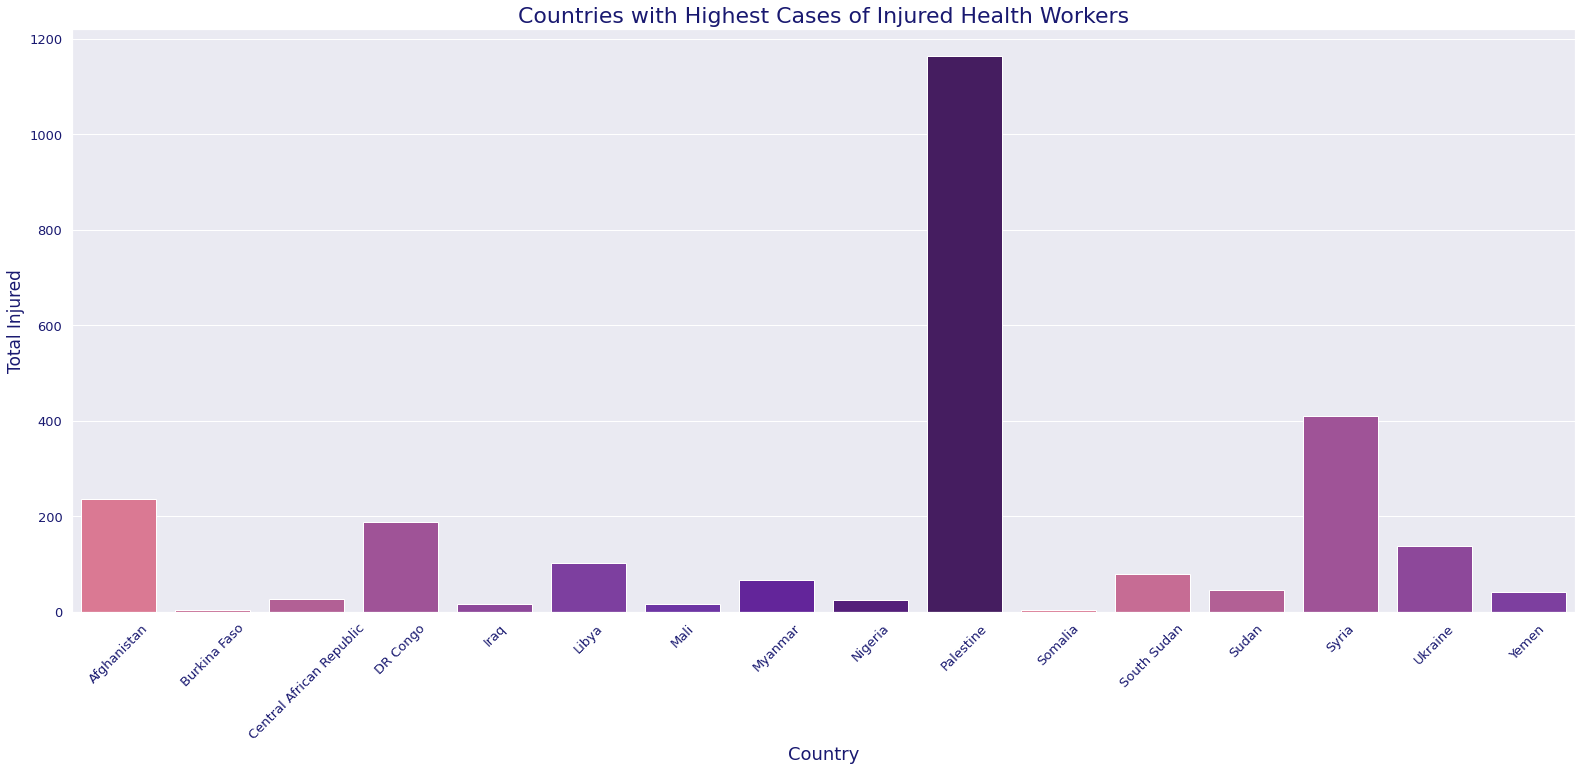

In [32]:
plt.figure(figsize=(24,10))
ax_1 = sns.barplot(x = 'Country', y = 'Total Injured', data=df_1, palette=my_colors_1)

plt.xticks(fontsize=13, color='midnightblue', rotation=45)
plt.yticks(fontsize=13, color='midnightblue')
plt.xlabel('Country', size = 18, color='midnightblue')
plt.ylabel('Total Injured', size = 17 , color='midnightblue')
plt.title('Countries with Highest Cases of Injured Health Workers', size = 22 , color='midnightblue')
plt.show()

## Scatter Plot Cross Deaths and Injured

In [33]:
fig = px.scatter(df_1, x="Total Death", y="Total Injured", color="Total Death", size_max=35,
                 size='Total Death', template = 'plotly_white', hover_data=['Country', 'Total Death', 'Total Injured'],
                 title='Scatter Plot Cross Deaths and Injured')
fig.show()

## Scatter Plot Cross Deaths and Injured

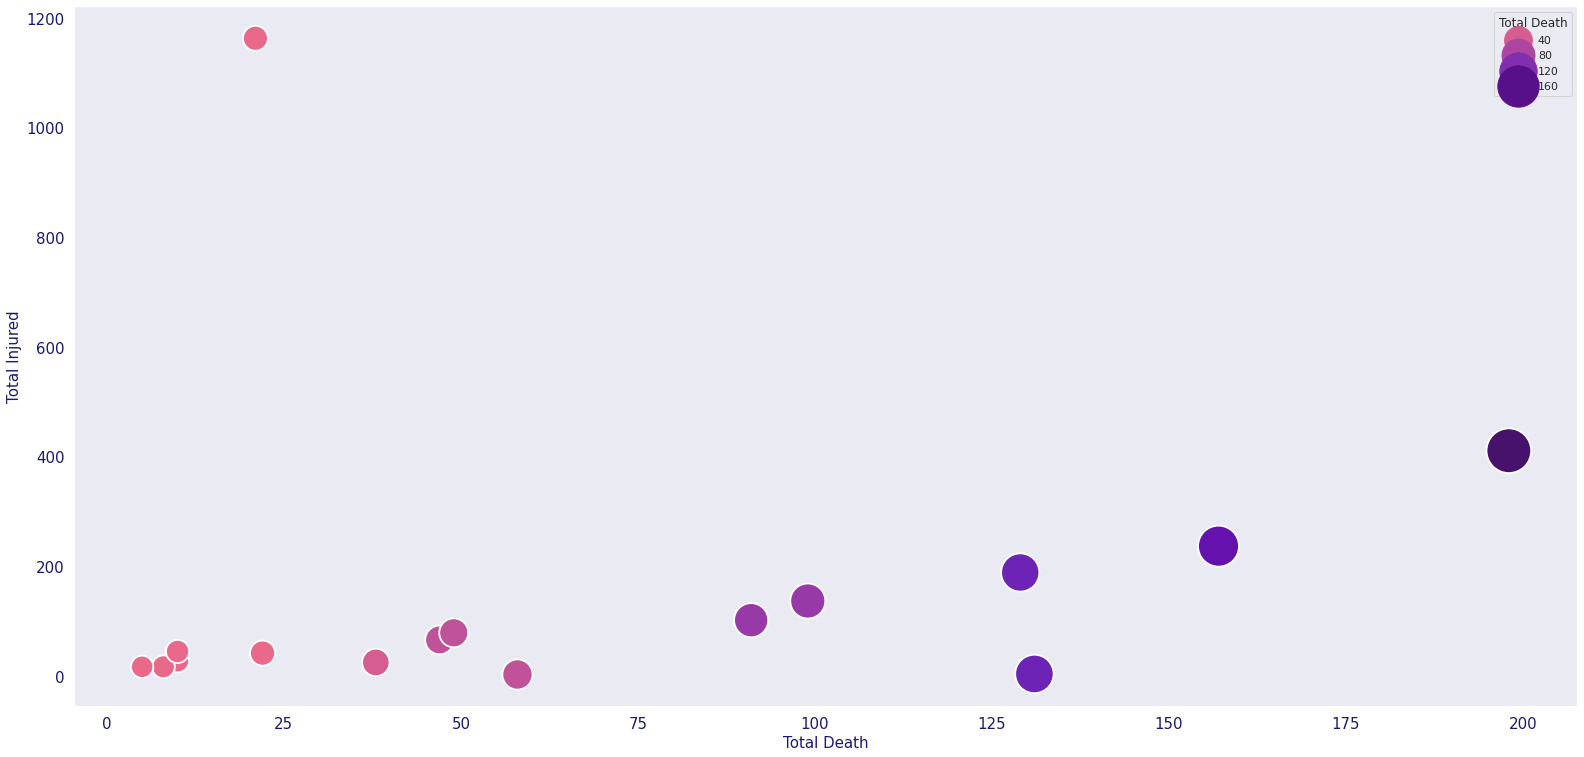

In [34]:
sns.set_theme(style='dark')
plt.figure(figsize=(24,12))
ax = sns.scatterplot(data=df_1, x="Total Death", y="Total Injured", size="Total Death", sizes=(500, 2000),
               hue="Total Death", palette=CMAP2)
plt.xticks(fontsize=15, color='midnightblue')
plt.yticks(fontsize=15, color='midnightblue')
plt.xlabel('Total Death', size=15, color='midnightblue')
plt.ylabel('Total Injured', size=15, color='midnightblue')
plt.show()

In [35]:
fig = px.scatter(data, x="year", y="Total Death", color="Total Death", size_max=35,
                 size='Total Death', template = 'plotly_white', hover_data=['Country', 'Total Death', 'Total Injured'],
                 title='Scatter Plot of Death Incidents against different Years')
fig.show()

# Arrests, Detentions & Obduction Incidents Against Health Workers

<center><img src="https://upload.wikimedia.org/wikipedia/en/thumb/f/f2/Aljazeera_eng.svg/1200px-Aljazeera_eng.svg.png" 
             style='border-radius:10px'></center>

<center><img src="https://i.postimg.cc/MG9Q0wMP/Myanmar.png" 
             style='border-radius:10px'></center>             

<center><img src="https://www.aljazeera.com/wp-content/uploads/2022/07/285617_Myanmar-landmine-use.jpeg" 
             style='border-radius:10px'></center>

## Countries with Highest Arrest Incidents of Health Workers

In [36]:
df_2 = data[['Country', 'HW Arrest', 'HW Detention', 'HW Abduction']].groupby(['Country']).sum().reset_index()
fig = px.bar(df_2, x='Country', y= 'HW Arrest', 
             template = 'plotly_white', title= 'Countries with Highest Arrest Incidents of Health Workers', 
             color='HW Arrest', height=800,
             hover_data= ['Country', 'HW Arrest', 'HW Detention', 'HW Abduction'])
fig.update_xaxes(tickangle=45, rangeselector_font_size=8)
fig.show()

<center><img src="https://raw.githubusercontent.com/AbdullahSangha/Attacks-against-Health-Workers-PICS/main/Myanmar_Report.png?token=GHSAT0AAAAAABURCKFGD5AY5MDNAJNGUYD6YX6P3FA" 
             style='border-radius:10px'></center>


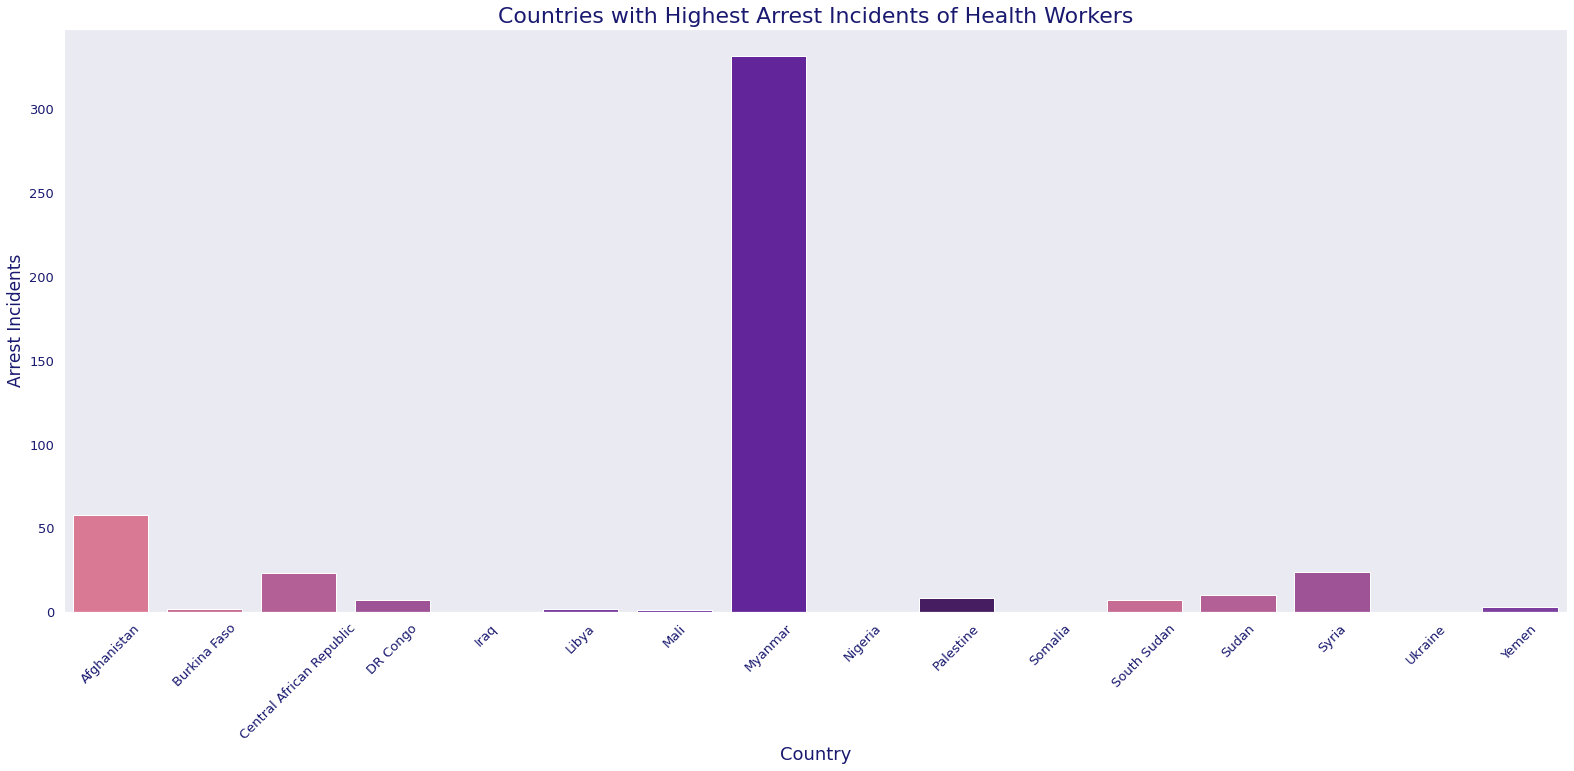

In [37]:
plt.figure(figsize=(24,10))
ax_1 = sns.barplot(x = 'Country', y = 'HW Arrest', data=df_2, palette=my_colors_1)

plt.xticks(fontsize=13, color='midnightblue', rotation=45)
plt.yticks(fontsize=13, color='midnightblue')
plt.xlabel('Country', size = 18, color='midnightblue')
plt.ylabel('Arrest Incidents', size = 17 , color='midnightblue')
plt.title('Countries with Highest Arrest Incidents of Health Workers', size = 22 , color='midnightblue')
plt.show()

## Countries with Highest Detention Incidents of Health Workers

In [38]:
fig = px.bar(df_2, x='Country', y= 'HW Detention', 
             template = 'plotly_white', title= 'Countries with Highest Detention Incidents of Health Workers', 
             color='HW Detention', height=800,
             hover_data= ['Country', 'HW Arrest', 'HW Detention', 'HW Abduction'])
fig.update_xaxes(tickangle=45, rangeselector_font_size=8)
fig.show()

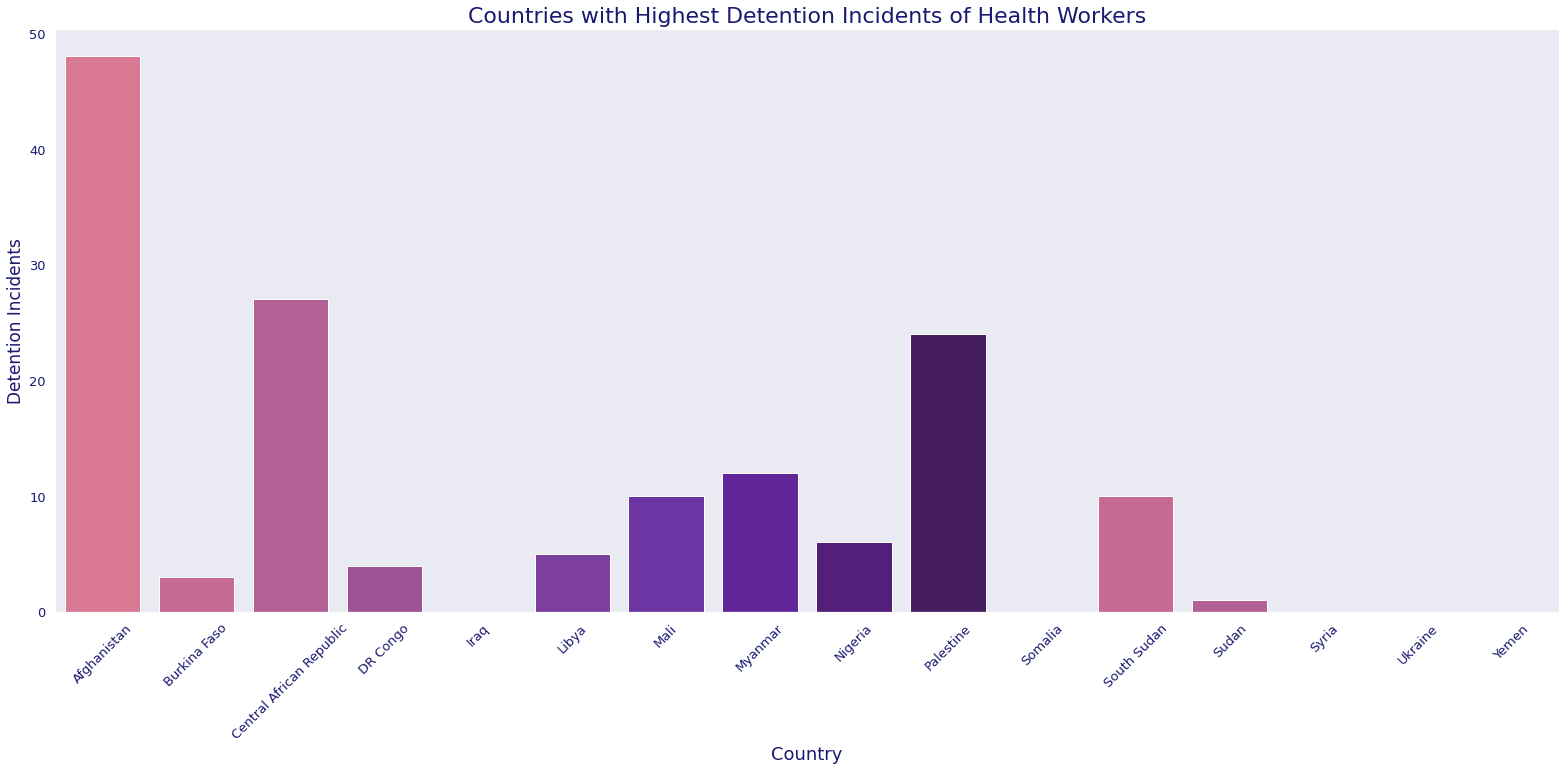

In [39]:
plt.figure(figsize=(24,10))
ax_1 = sns.barplot(x = 'Country', y = 'HW Detention', data=df_2, palette=my_colors_1)

plt.xticks(fontsize=13, color='midnightblue', rotation=45)
plt.yticks(fontsize=13, color='midnightblue')
plt.xlabel('Country', size = 18, color='midnightblue')
plt.ylabel('Detention Incidents', size = 17 , color='midnightblue')
plt.title('Countries with Highest Detention Incidents of Health Workers', size = 22 , color='midnightblue')
plt.show()

## Countries with Highest Abduction Incidents of Health Workers

In [40]:
fig = px.bar(df_2, x='Country', y= 'HW Abduction', 
             template = 'plotly_white', title= 'Countries with Highest Abduction Incidents of Health Workers', 
             color='HW Abduction', height=800,
             hover_data= ['Country', 'HW Arrest', 'HW Detention', 'HW Abduction'])
fig.update_xaxes(tickangle=45, rangeselector_font_size=8)
fig.show()

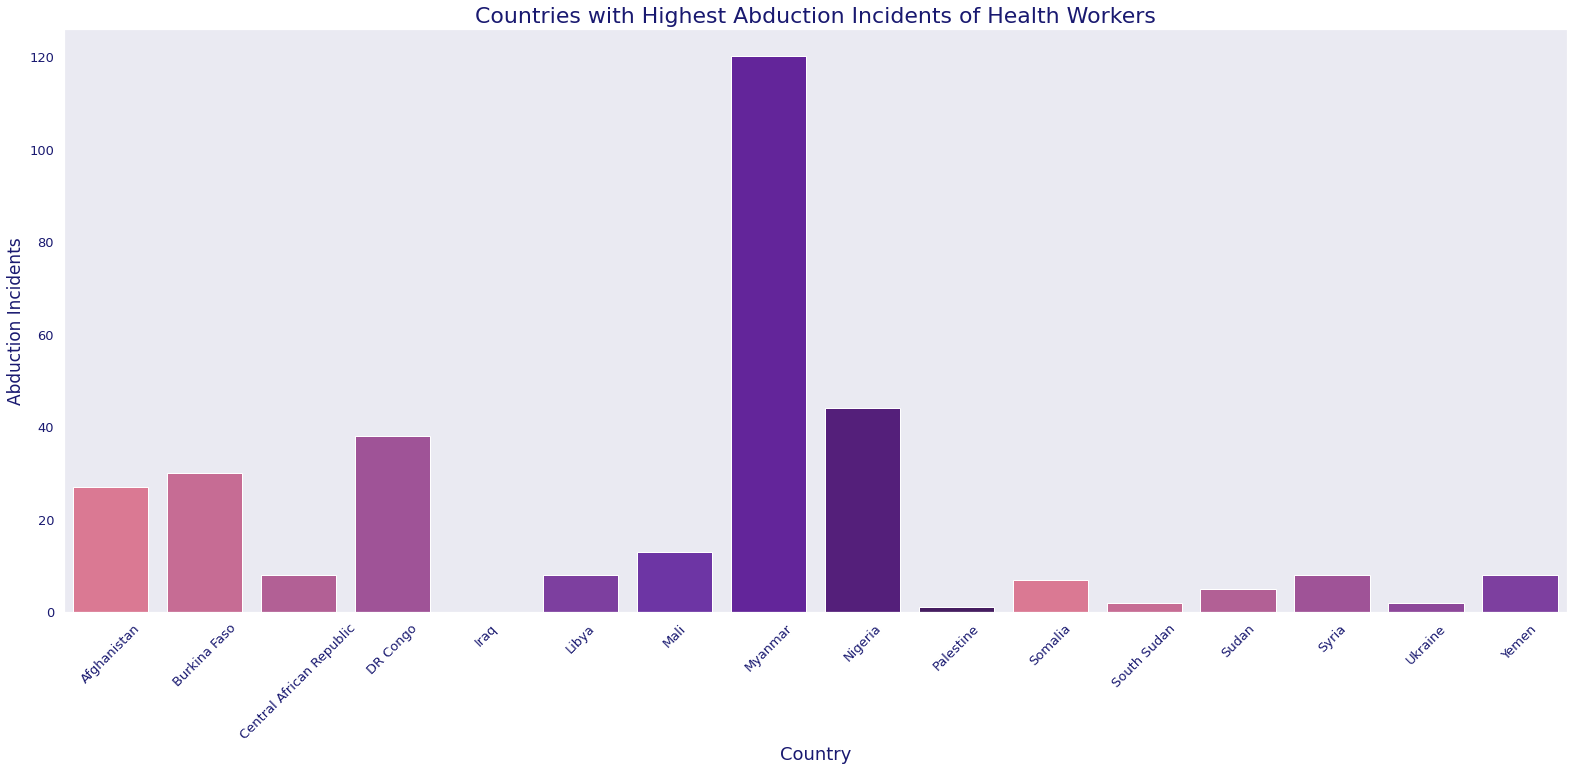

In [41]:
plt.figure(figsize=(24,10))
ax_1 = sns.barplot(x = 'Country', y = 'HW Abduction', data=df_2, palette=my_colors_1)

plt.xticks(fontsize=13, color='midnightblue', rotation=45)
plt.yticks(fontsize=13, color='midnightblue')
plt.xlabel('Country', size = 18, color='midnightblue')
plt.ylabel('Abduction Incidents', size = 17 , color='midnightblue')
plt.title('Countries with Highest Abduction Incidents of Health Workers', size = 22 , color='midnightblue')
plt.show()

## Scatter Geo Plotly

## Countries with Highest Death incidents of Health Workers

<center><img src="https://upload.wikimedia.org/wikipedia/en/thumb/f/f2/Aljazeera_eng.svg/1200px-Aljazeera_eng.svg.png" 
             style='border-radius:10px'></center>

<center><img src="https://i.postimg.cc/sX1ZwL5V/Syria-War.png" 
             style='border-radius:10px'></center>             

<center><img src="https://www.aljazeera.com/wp-content/uploads/2021/06/000_9BZ8BY.jpg" 
             style='border-radius:10px'></center>

In [42]:
fig = px.scatter_geo(df_1, locationmode = "country names", locations="Country", color="Total Death",
                     hover_data=['Country', 'Total Death', 'Total Injured'], size="Total Death",
                     projection="natural earth", size_max = 25, template = 'plotly_dark')
fig.show()

## Countries with Highest Cases of Injured Health Workers

<center><img src="https://upload.wikimedia.org/wikipedia/en/thumb/f/f2/Aljazeera_eng.svg/1200px-Aljazeera_eng.svg.png" 
             style='border-radius:10px'></center>

<center><img src="https://i.postimg.cc/hjHbxnNF/Syria-warss.png" 
             style='border-radius:10px'></center>             

<center><img src="https://www.aljazeera.com/wp-content/uploads/2019/12/eb9f085e864a4fbeabf9d4fe9b4d5a70_18.jpeg" 
             style='border-radius:10px'></center>

In [43]:
fig = px.scatter_geo(df_1, locationmode = "country names", locations="Country", color="Total Injured",
                     hover_data=['Country', 'Total Death', 'Total Injured'], size="Total Injured",
                     projection="natural earth", size_max = 25, template = 'plotly_dark')
fig.show()

<a id="8"></a> 
# <b>8 <span style='color:#3a0ca3'>|</span> References</b>

### https://www.nytimes.com/2018/12/30/world/middleeast/gaza-medic-israel-shooting.html
### https://www.nytimes.com/2019/12/29/world/middleeast/united-nations-syria-russia.html
### https://www.aljazeera.com/news/2022/7/22/civilians-killed-in-russian-air-attack-on-syrias-idlib
### https://www.aljazeera.com/news/2019/12/4/when-care-becomes-criminal-syrian-health-workers-targeted

<center><img src="https://images.unsplash.com/photo-1571756407234-46f229d6b801?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=1476&q=80" 
             style='border-radius:10px'></center>
